Most customers do not post a review rating or any comment after purchasing a product which is a challenge for any ecommerce platform to perform If a company predicts whether a customer liked/disliked a product so that they can recommend more similar and related products as well as they can decide whether or not a product should be sold at their end. This is crucial for ecommerce based company because they need to keep track of each product of each seller , so that none of products discourage their customers to come shop with them again. Moreover, if a specific product has very few rating and that too negetive, a company must not drop the product straight away, may be many customers who found the product to be useful haven't actually rated it.

Some reasons could possibly be comparing your product review with those of your competitors beforehand,gaining lots of insight about the product and saving a lot of manual data pre-processin,maintain good customer relationship with company,lend gifts, offers and deals if the company feels the customer is going to break the relation.

Objective of this case study is centered around predicting customer satisfaction with a product which can be deduced after predicting the product rating a user would rate after he makes a purchase.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [4]:
df_customers = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_customers_dataset.csv')
df_geolocation = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_geolocation_dataset.csv')
df_orderitem = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_order_items_dataset.csv')
df_payment = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_orders_dataset.csv')
df_products = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_products_dataset.csv')
df_seller = pd.read_csv('/content/drive/MyDrive/olist/orders/olist_sellers_dataset.csv')
df_productcategory = pd.read_csv('/content/drive/MyDrive/olist/orders/product_category_name_translation.csv')


In [6]:
def dataframe_summary(df):
    # Create an empty dictionary to store summary data
    summary_data = {
        'Column': [],
        'No. of Nulls': [],
        'No. of Unique': [],
        'Unique Values': [],
        'Data Type': []
    }

    # Iterate through each column in the DataFrame
    for col in df.columns:
        summary_data['Column'].append(col)
        summary_data['No. of Nulls'].append(df[col].isnull().sum())  # Number of null values
        summary_data['No. of Unique'].append(df[col].nunique())  # Number of unique values
        summary_data['Unique Values'].append(df[col].unique()[:5])  # Show up to 5 unique values
        summary_data['Data Type'].append(df[col].dtype)  # Data type of the column

    # Convert the summary dictionary into a DataFrame
    summary_df = pd.DataFrame(summary_data)

    return summary_df

In [7]:
dataframe_summary(df_customers)

,Column,No. of Nulls,No. of Unique,Unique Values,Data Type
0,customer_id,0,99441,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33...",object
1,customer_unique_id,0,96096,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529...",object
2,customer_zip_code_prefix,0,14994,"[14409, 9790, 1151, 8775, 13056]",int64
3,customer_city,0,4119,"[franca, sao bernardo do campo, sao paulo, mog...",object
4,customer_state,0,27,"[SP, SC, MG, PR, RJ]",object


In [8]:
dataframe_summary(df_orderitem)

,Column,No. of Nulls,No. of Unique,Unique Values,Data Type
0,order_id,0,98666,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f...",object
1,order_item_id,0,21,"[1, 2, 3, 4, 5]",int64
2,product_id,0,32951,"[4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802...",object
3,seller_id,0,3095,"[48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b...",object
4,shipping_limit_date,0,93318,"[2017-09-19 09:45:35, 2017-05-03 11:05:13, 201...",object
5,price,0,5968,"[58.9, 239.9, 199.0, 12.99, 199.9]",float64
6,freight_value,0,6999,"[13.29, 19.93, 17.87, 12.79, 18.14]",float64


In [9]:
df_orderitem.price.describe()

,price
count,112650.000000
mean,120.653739
std,183.633928
min,0.850000
25%,39.900000
50%,74.990000
75%,134.900000
max,6735.000000


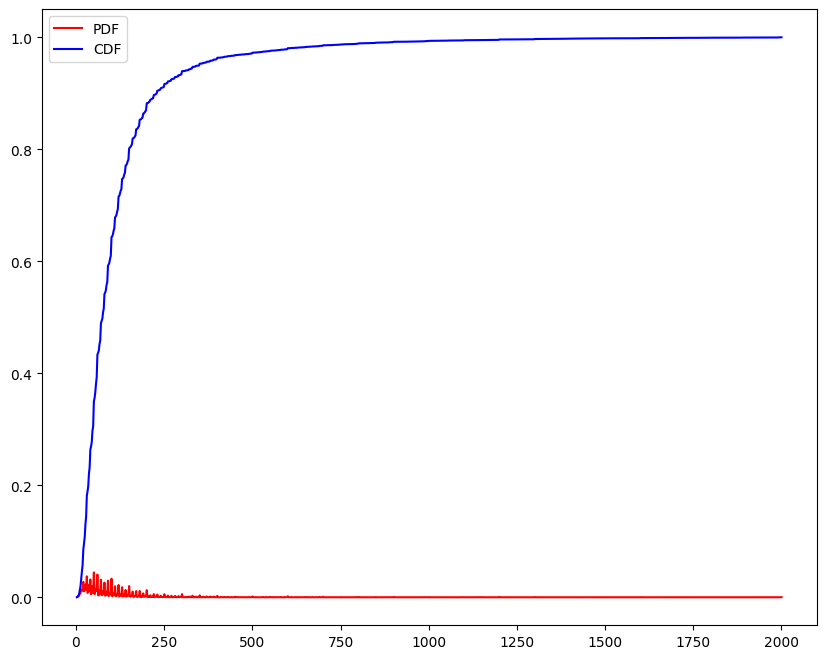

In [10]:
#temporararily removing few outliers that can reduce the smoothness of the pdf and cdf
sata = df_orderitem[df_orderitem.price <= 2000]
counts, bin_edges = np.histogram(sata.price, bins=1000,
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.figure(figsize=(10,8))
plt.plot(bin_edges[1:],pdf,color='red',label='PDF')
plt.plot(bin_edges[1:], cdf,color='blue',label='CDF')
plt.legend()


plt.show();

In [11]:
dataframe_summary(df_reviews)

,Column,No. of Nulls,No. of Unique,Unique Values,Data Type
0,review_id,0,98410,"[7bc2406110b926393aa56f80a40eba40, 80e641a11e5...",object
1,order_id,0,98673,"[73fc7af87114b39712e6da79b0a377eb, a548910a1c6...",object
2,review_score,0,5,"[4, 5, 1, 3, 2]",int64
3,review_comment_title,87656,4527,"[nan, recomendo, Super recomendo, Não chegou m...",object
4,review_comment_message,58247,36159,"[nan, Recebi bem antes do prazo estipulado., P...",object
5,review_creation_date,0,636,"[2018-01-18 00:00:00, 2018-03-10 00:00:00, 201...",object
6,review_answer_timestamp,0,98248,"[2018-01-18 21:46:59, 2018-03-11 03:05:13, 201...",object


In [12]:
dataframe_summary(df_geolocation)

,Column,No. of Nulls,No. of Unique,Unique Values,Data Type
0,geolocation_zip_code_prefix,0,19015,"[1037, 1046, 1041, 1035, 1012]",int64
1,geolocation_lat,0,717360,"[-23.54562128115268, -23.54608112703553, -23.5...",float64
2,geolocation_lng,0,717613,"[-46.63929204800168, -46.64482029837157, -46.6...",float64
3,geolocation_city,0,8011,"[sao paulo, são paulo, sao bernardo do campo, ...",object
4,geolocation_state,0,27,"[SP, RN, AC, RJ, ES]",object


In [13]:
dataframe_summary(df_orders)

,Column,No. of Nulls,No. of Unique,Unique Values,Data Type
0,order_id,0,99441,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc...",object
1,customer_id,0,99441,"[9ef432eb6251297304e76186b10a928d, b0830fb4747...",object
2,order_status,0,8,"[delivered, invoiced, shipped, processing, una...",object
3,order_purchase_timestamp,0,98875,"[2017-10-02 10:56:33, 2018-07-24 20:41:37, 201...",object
4,order_approved_at,160,90733,"[2017-10-02 11:07:15, 2018-07-26 03:24:27, 201...",object
5,order_delivered_carrier_date,1783,81018,"[2017-10-04 19:55:00, 2018-07-26 14:31:00, 201...",object
6,order_delivered_customer_date,2965,95664,"[2017-10-10 21:25:13, 2018-08-07 15:27:45, 201...",object
7,order_estimated_delivery_date,0,459,"[2017-10-18 00:00:00, 2018-08-13 00:00:00, 201...",object


In [14]:
dataframe_summary(df_products)

,Column,No. of Nulls,No. of Unique,Unique Values,Data Type
0,product_id,0,32951,"[1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb...",object
1,product_category_name,610,73,"[perfumaria, artes, esporte_lazer, bebes, util...",object
2,product_name_lenght,610,66,"[40.0, 44.0, 46.0, 27.0, 37.0]",float64
3,product_description_lenght,610,2960,"[287.0, 276.0, 250.0, 261.0, 402.0]",float64
4,product_photos_qty,610,19,"[1.0, 4.0, 2.0, 3.0, 5.0]",float64
5,product_weight_g,2,2204,"[225.0, 1000.0, 154.0, 371.0, 625.0]",float64
6,product_length_cm,2,99,"[16.0, 30.0, 18.0, 26.0, 20.0]",float64
7,product_height_cm,2,102,"[10.0, 18.0, 9.0, 4.0, 17.0]",float64
8,product_width_cm,2,95,"[14.0, 20.0, 15.0, 26.0, 13.0]",float64


In [15]:
#renaming all the zip_code_prefix so as to make the name common in all tables inorder to perform join

df_geolocation.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)
df_customers.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'},inplace=True)
df_seller.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'},inplace=True)

In [16]:
#keeping only the unique zip code prefix so that it can act as key to join tables
df_geolocation.drop_duplicates(subset='zip_code_prefix',inplace=True)
df_geolocation.shape

(19015, 5)

In [17]:
#merging all customer related data

A = pd.merge(df_orders,df_reviews,on='order_id')
A = pd.merge(A,df_payment,on='order_id')
A = pd.merge(A,df_customers,on='customer_id')
#peforming left outer join as we need every geo based address related to customer
A = pd.merge(A,df_geolocation,how='left',on='zip_code_prefix')
A.shape

(103677, 26)

In [18]:
#merging all seller related data

B = pd.merge(df_orderitem,df_products,on='product_id')
B = pd.merge(B,df_seller,on='seller_id')
B = pd.merge(B,df_productcategory,on='product_category_name')
#peforming left outer join as we need every geo based address related to seller
B = pd.merge(B,df_geolocation,how='left',on='zip_code_prefix')
B.shape

(111023, 23)

In [19]:
#merging customer based data to the seller based data

data = pd.merge(A,B,on='order_id')
data.shape

(115609, 48)

In [20]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'zip_code_prefix_x', 'customer_city', 'customer_state',
       'geolocation_lat_x', 'geolocation_lng_x', 'geolocation_city_x',
       'geolocation_state_x', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_y', 'seller_city', 'seller_state',
    

In [21]:
dataframe_summary(data)

,Column,No. of Nulls,No. of Unique,Unique Values,Data Type
0,order_id,0,96516,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc...",object
1,customer_id,0,96516,"[9ef432eb6251297304e76186b10a928d, b0830fb4747...",object
2,order_status,0,7,"[delivered, shipped, invoiced, processing, can...",object
3,order_purchase_timestamp,0,95989,"[2017-10-02 10:56:33, 2018-07-24 20:41:37, 201...",object
4,order_approved_at,14,88332,"[2017-10-02 11:07:15, 2018-07-26 03:24:27, 201...",object
5,order_delivered_carrier_date,1195,79241,"[2017-10-04 19:55:00, 2018-07-26 14:31:00, 201...",object
6,order_delivered_customer_date,2400,93702,"[2017-10-10 21:25:13, 2018-08-07 15:27:45, 201...",object
7,order_estimated_delivery_date,0,449,"[2017-10-18 00:00:00, 2018-08-13 00:00:00, 201...",object
8,review_id,0,96319,"[a54f0611adc9ed256b57ede6b6eb5114, 8d526604204...",object
9,review_score,0,5,"[4, 5, 1, 2, 3]",int64


In [22]:
data = data[data['geolocation_state_y'] == data['seller_state']]
#list of useless feature
useless_features = ['review_comment_title','review_comment_message','product_category_name','product_weight_g','review_creation_date',
                    'product_length_cm','product_height_cm','product_width_cm','seller_city','review_answer_timestamp',
                   'geolocation_lat_y','geolocation_lng_y','geolocation_city_y','geolocation_state_y','review_id','order_approved_at','order_status',
                   'order_id','customer_id','order_item_id','geolocation_lat_x',
                   'geolocation_lng_x','geolocation_city_x','geolocation_state_x']
print('Number of useless features as of now are : ',len(useless_features))

data.drop(useless_features,axis=1,inplace=True)

data.rename(columns = {'product_category_name_english':'product_category_name','zip_code_prefix_x':'zipCode_prefix_cust',
                      'zip_code_prefix_y':'zipCode_prefix_seller'},inplace=True)

Number of useless features as of now are :  24


In [24]:
data.dropna(how='any',inplace=True)


In [25]:
dataframe_summary(data)

,Column,No. of Nulls,No. of Unique,Unique Values,Data Type
0,order_purchase_timestamp,0,93229,"[2017-10-02 10:56:33, 2018-08-08 08:38:49, 201...",object
1,order_delivered_carrier_date,0,77817,"[2017-10-04 19:55:00, 2018-08-08 13:50:00, 201...",object
2,order_delivered_customer_date,0,92945,"[2017-10-10 21:25:13, 2018-08-17 18:06:29, 201...",object
3,order_estimated_delivery_date,0,444,"[2017-10-18 00:00:00, 2018-09-04 00:00:00, 201...",object
4,review_score,0,5,"[4, 5, 1, 2, 3]",int64
5,payment_sequential,0,26,"[1, 3, 2, 4, 8]",int64
6,payment_type,0,4,"[credit_card, voucher, boleto, debit_card]",object
7,payment_installments,0,24,"[1, 3, 6, 10, 4]",int64
8,payment_value,0,28179,"[18.12, 2.0, 18.59, 179.12, 72.2]",float64
9,customer_unique_id,0,90760,"[7c396fd4830fd04220f754e42b4e5bff, 3a653a41f6f...",object


In [26]:
data.shape

(112296, 24)

In [28]:
#converting the timestamp format data to date data as we need just the date and not the exact time
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp']).dt.date
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date']).dt.date
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date']).dt.date
data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date']).dt.date

In [29]:
#subtracting the order_purchase_time to rest time based feature and converting date time into string to remove the timestamp notation
data['delivery_days'] = data['order_delivered_customer_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)
data['estimated_days'] = data['order_estimated_delivery_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)
data['ships_in'] = data['shipping_limit_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)

In [31]:
data.head()

,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,zipCode_prefix_cust,customer_city,customer_state,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,zipCode_prefix_seller,seller_state,product_category_name,delivery_days,estimated_days,ships_in
0,2017-10-02,2017-10-04 19:55:00,2017-10-10,2017-10-18,4,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.99,8.72,40.0,268.0,4.0,9350,SP,housewares,"8 days, 0:00:00","16 days, 0:00:00","4 days, 0:00:00"
1,2017-10-02,2017-10-04 19:55:00,2017-10-10,2017-10-18,4,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.99,8.72,40.0,268.0,4.0,9350,SP,housewares,"8 days, 0:00:00","16 days, 0:00:00","4 days, 0:00:00"
2,2017-10-02,2017-10-04 19:55:00,2017-10-10,2017-10-18,4,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06,29.99,8.72,40.0,268.0,4.0,9350,SP,housewares,"8 days, 0:00:00","16 days, 0:00:00","4 days, 0:00:00"
4,2018-08-08,2018-08-08 13:50:00,2018-08-17,2018-09-04,5,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13,159.90,19.22,46.0,232.0,1.0,14840,SP,auto,"9 days, 0:00:00","27 days, 0:00:00","5 days, 0:00:00"
5,2017-11-18,2017-11-22 13:39:59,2017-12-02,2017-12-15,5,1,credit_card,1,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23,45.00,27.20,59.0,468.0,3.0,31842,MG,pet_shop,"14 days, 0:00:00","27 days, 0:00:00","5 days, 0:00:00"


In [33]:
#replacing the time stamp notation and converting type to int
data['delivery_days'] = data['delivery_days'].str.extract('(\d+)').astype(int)


In [34]:
data['estimated_days'] = data['estimated_days'].str.extract('(\d+)').astype(int)
data['ships_in'] = data['ships_in'].str.extract('(\d+)').astype(int)

# Calculate 'arrival_time'
data['arrival_time'] = (data['estimated_days'] - data['delivery_days']).apply(lambda x: 'Early/OnTime' if x > 0 else 'Late')

In [35]:
data.describe()

,review_score,payment_sequential,payment_installments,payment_value,zipCode_prefix_cust,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,zipCode_prefix_seller,delivery_days,estimated_days,ships_in
count,112296.000000,112296.000000,112296.000000,112296.000000,112296.000000,112296.000000,112296.000000,112296.000000,112296.000000,112296.000000,112296.000000,112296.000000,112296.000000,112296.000000
mean,4.081624,1.091090,2.942625,171.860579,35067.618312,120.075466,20.000117,48.792860,785.763678,2.199152,24336.738593,12.384893,24.475850,6.696579
std,1.346599,0.688731,2.779729,264.886956,29866.731667,181.567241,15.742491,10.012996,652.061689,1.712171,27536.389676,9.373091,8.842415,5.503152
min,1.000000,1.000000,0.000000,0.000000,1003.000000,0.850000,0.000000,5.000000,4.000000,1.000000,1001.000000,0.000000,3.000000,2.000000
25%,4.000000,1.000000,1.000000,60.850000,11250.000000,39.900000,13.070000,42.000000,345.000000,1.000000,6429.000000,7.000000,19.000000,5.000000
50%,5.000000,1.000000,2.000000,107.910000,24240.000000,74.900000,16.290000,52.000000,600.000000,1.000000,13568.000000,10.000000,24.000000,6.000000
75%,5.000000,1.000000,4.000000,189.420000,58840.000000,134.000000,21.180000,57.000000,985.000000,3.000000,26020.000000,15.000000,29.000000,8.000000
max,5.000000,26.000000,24.000000,13664.080000,99980.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,99730.000000,208.000000,156.000000,1052.000000


In [36]:
#dropping exceptional delivery or possible outliers
ix = data[(data['delivery_days'] > 60) | (data['estimated_days'] > 60) | (data['ships_in'] > 60)].index
print(ix.shape)

print('Percentage of extermely late delivered packages in the dataset is: {}%'.format(round((((ix.shape[0])/(data.shape[0])))*100,3)))
#we can remove those outliers
data.drop(ix,inplace=True)

(606,)
Percentage of extermely late delivered packages in the dataset is: 0.54%


In [37]:
#binning and grouping delivery times into groups or classes

delivery_feedbacks = []
estimated_del_feedbacks = []
shipping_feedback = []
d_days = data.delivery_days.values.tolist()
est_days = data.estimated_days.values.tolist()
ship_days = data.ships_in.values.tolist()

#actural delivery days
for i in d_days:
    if i in range(0,8):
        delivery_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        delivery_feedbacks.append('Fast')
    elif i in range(16,25):
        delivery_feedbacks.append('Neutral')
    elif i in range(25,40):
        delivery_feedbacks.append('Slow')
    elif i in range(40,61):
        delivery_feedbacks.append('Worst')

#estimated delivery days
for i in est_days:
    if i in range(0,8):
        estimated_del_feedbacks.append('Very_Fast')
    elif i in range(8,16):
        estimated_del_feedbacks.append('Fast')
    elif i in range(16,25):
        estimated_del_feedbacks.append('Neutral')
    elif i in range(25,40):
        estimated_del_feedbacks.append('Slow')
    elif i in range(40,61):
        estimated_del_feedbacks.append('Worst')

#estimated shipping days
for i in ship_days:
    if i in range(0,4):
        shipping_feedback.append('Very_Fast')
    elif i in range(4,8):
        shipping_feedback.append('Fast')
    elif i in range(8,16):
        shipping_feedback.append('Neutral')
    elif i in range(16,28):
        shipping_feedback.append('Slow')
    elif i in range(28,61):
        shipping_feedback.append('Worst')

#putting list values into the dataframe as feature
data['delivery_impression'] = delivery_feedbacks
data['estimated_del_impression'] = estimated_del_feedbacks
data['ship_impression'] = shipping_feedback

In [38]:
#seller popularity based on number of orders for each seller
max_value_count = data.seller_id.value_counts().max()
seller = data.seller_id.value_counts().to_dict()
seller_popularity = []
for _id in data.seller_id.values:
    seller_popularity.append(seller[_id])
data['seller_popularity'] = seller_popularity
data.shape

(111690, 32)

In [39]:
#dropping all id based features
data.drop(['customer_unique_id','seller_id','product_id','zipCode_prefix_seller','zipCode_prefix_cust'],axis=1,inplace=True)

In [40]:
#if score> 3, set score = 1
#if score<=3, set score = 0
data.loc[data['review_score'] < 3 ,'Score'] = 0
data.loc[data['review_score'] > 3,'Score'] = 1
#removing neutral reviews
data.drop(data[data['review_score'] == 3].index,inplace=True)
data.drop('review_score',axis=1,inplace=True)
print(data.shape)

(102302, 27)


In [41]:
#removing the datetime features as we dont need them now
data.drop(['order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date','shipping_limit_date'],axis=1,inplace=True)
data.to_csv('preprocessed_data.csv',index=False)

In [42]:
dataframe_summary(data)

,Column,No. of Nulls,No. of Unique,Unique Values,Data Type
0,payment_sequential,0,26,"[1, 3, 2, 4, 8]",int64
1,payment_type,0,4,"[credit_card, voucher, boleto, debit_card]",object
2,payment_installments,0,23,"[1, 3, 6, 10, 4]",int64
3,payment_value,0,26964,"[18.12, 2.0, 18.59, 179.12, 72.2]",float64
4,customer_city,0,3943,"[sao paulo, vianopolis, sao goncalo do amarant...",object
5,customer_state,0,27,"[SP, GO, RN, PR, RJ]",object
6,price,0,5549,"[29.99, 159.9, 45.0, 19.9, 147.9]",float64
7,freight_value,0,6637,"[8.72, 19.22, 27.2, 27.36, 15.17]",float64
8,product_name_lenght,0,65,"[40.0, 46.0, 59.0, 38.0, 49.0]",float64
9,product_description_lenght,0,2915,"[268.0, 232.0, 468.0, 316.0, 608.0]",float64
